In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline

In [3]:
data = pd.read_csv("./Downloads/VOF.L.csv")
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1323,2022-03-25,502.0,507.000000,502.000000,507.0,493.078217,265108
1324,2022-03-28,502.0,511.000000,502.000000,506.0,492.105652,115303
1325,2022-03-29,502.0,520.000000,500.000000,518.0,503.776154,149574
1326,2022-03-30,516.0,516.989990,507.666992,513.0,498.913422,65890
1327,2022-03-31,514.0,516.588989,506.000000,506.0,492.105652,68055


In [4]:
data.index = pd.to_datetime(data['Date'])
data.drop(columns='Date',inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,272.0,275.00,272.00,273.25,233.939148,170046
2017-01-04,272.0,275.00,272.00,272.75,233.511093,107823
2017-01-05,272.0,274.50,270.25,272.50,233.297043,391623
2017-01-06,272.5,273.75,266.00,273.00,233.725098,464329
2017-01-09,273.0,273.50,270.00,273.50,234.153183,276108


<AxesSubplot:xlabel='Date'>

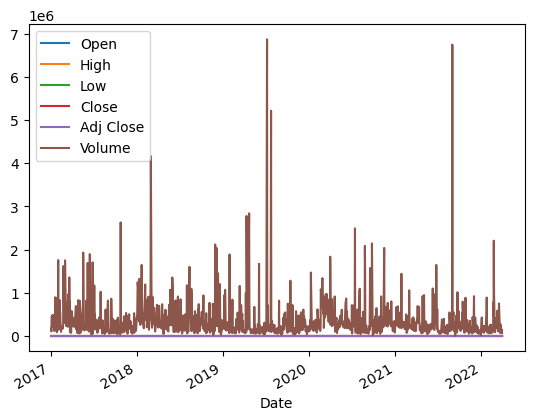

In [5]:
data.plot()

In [6]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1328 entries, 2017-01-03 to 2022-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1328 non-null   float64
 1   High       1328 non-null   float64
 2   Low        1328 non-null   float64
 3   Close      1328 non-null   float64
 4   Adj Close  1328 non-null   float64
 5   Volume     1328 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 72.6 KB


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
m = seasonal_decompose(data["Open"], period = 7)

In [11]:
m1=m.seasonal

<AxesSubplot:xlabel='Date'>

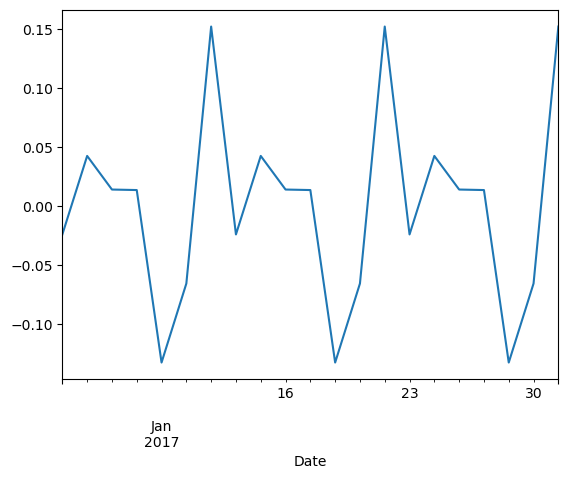

In [12]:
m1[0:21].plot()

In [13]:
m2 = seasonal_decompose(data["High"], period=7)

In [14]:
s1 =m2.seasonal

<AxesSubplot:xlabel='Date'>

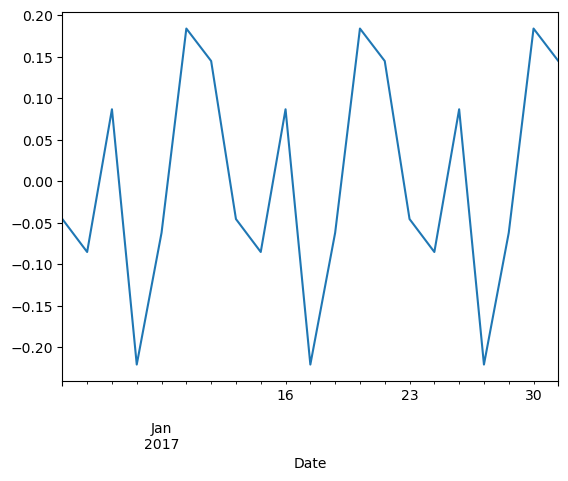

In [15]:
s1[0:21].plot()

In [16]:
m3 = seasonal_decompose(data["Low"], period=7)

In [17]:
s2 = m3.seasonal

<AxesSubplot:xlabel='Date'>

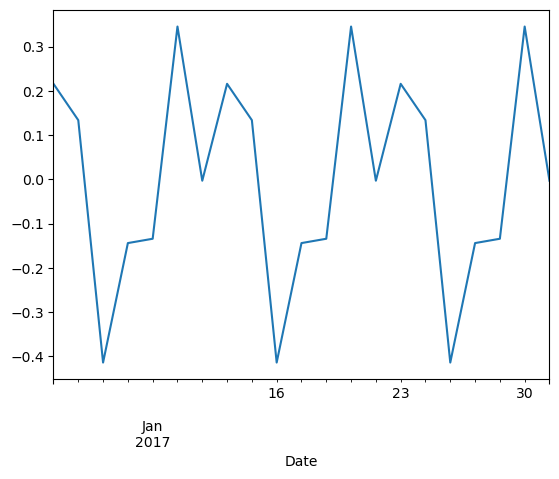

In [18]:
s2[0:21].plot()

In [19]:
m4 = seasonal_decompose(data["Close"], period=7)

In [20]:
s3 = m4.seasonal

<AxesSubplot:xlabel='Date'>

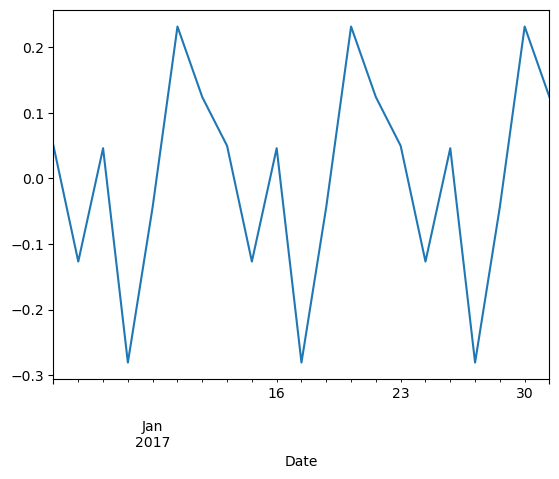

In [21]:
s3[0:21].plot()

In [22]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [23]:
from pmdarima import auto_arima

In [24]:
l1= list(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [25]:
l1

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [26]:
data[["Open"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1328 entries, 2017-01-03 to 2022-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1328 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [27]:
train = data["Open"].iloc[:1401]
test = data["Open"].iloc[1401:]

In [28]:
auto_arima(train, m=7, seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1328
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -3830.219
Date:                             Thu, 29 Dec 2022   AIC                           7674.438
Time:                                     04:15:00   BIC                           7710.772
Sample:                                          0   HQIC                          7688.057
                                            - 1328                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5331      0.017     90.379      0.000       1.500       1.566
ar.L2         -0.9403      0.018    -53.341      0.000      -0.975      -0.906
ma.L1         -1.5444      0.012   -124.036      0.000      -1.569      -1.520
ma.L2          0.9759      0.012     79.119      0.000       0.952       1.000
ar.S.L7       -0.7372      0.201     -3.668      0.000      -1.131      -0.343
ma.S.L7        0.7789      0.188      4.141      0.000       0.410       1.148
sigma2        18.8090      0.429     43.891      0.000      17.969      19.649
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               904.83
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               2.74   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
model = SARIMAX()

TypeError: __init__() missing 1 required positional argument: 'endog'

In [31]:
auto_arima(data["Open"], m=7, seasonal=True)

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
start=len(train)
end=len(train)+len(test)-1

In [36]:
model1 = SARIMAX(train,order=(2, 1, 2), seasonal_order=(1, 0, 1, 7))

C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
results= model1.fit()

In [38]:
prerdictions = results.predict(start=end, end=start, dynamic=False, typ='levels')

C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [39]:
prerdictions

1327    517.385401
1328    515.506211
Name: predicted_mean, dtype: float64

In [40]:
len(prerdictions)

2

In [41]:
x1 =results.forecast(10)

C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [42]:
x1

1328    515.506211
1329    516.969204
1330    517.355623
1331    517.355138
1332    516.432745
1333    515.985658
1334    514.087420
1335    513.340582
1336    513.417373
1337    514.561819
Name: predicted_mean, dtype: float64

In [43]:
x1.iloc[-1]

514.5618192121112

<AxesSubplot:>

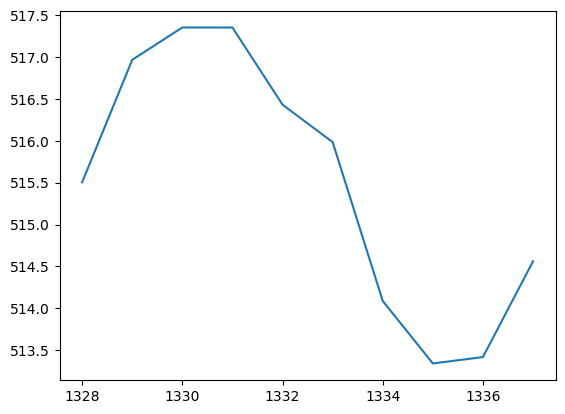

In [44]:
x1.plot()

In [45]:
data[["High"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1328 entries, 2017-01-03 to 2022-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1328 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [46]:
train = data["High"].iloc[:1401]
test = data["High"].iloc[1401:]

In [47]:
auto_arima(train, m=7, seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1328
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -3598.784
Date:                Thu, 29 Dec 2022   AIC                           7203.567
Time:                        04:27:43   BIC                           7219.139
Sample:                             0   HQIC                          7209.404
                               - 1328                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1544      0.102      1.516      0.130      -0.045       0.354
ar.L1          0.1518      0.017      8.840      0.000       0.118       0.185
sigma2        13.2771      0.227     58.538      0.000      12.833      13.722
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4299.40
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.57   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [49]:
model = SARIMAX()

TypeError: __init__() missing 1 required positional argument: 'endog'

In [50]:
auto_arima(data["High"], m=7, seasonal=True)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True)

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
start=len(train)
end=len(train)+len(test)-1

In [56]:
model2 = SARIMAX(train,order=(1, 1, 0), seasonal_order=(0, 0, 0, 7))

C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [57]:
results= model2.fit()

In [58]:
prerdictions = results.predict(start=end, end=start, dynamic=False, typ='levels')

C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [59]:
prerdictions

1327    516.526840
1328    516.527287
Name: predicted_mean, dtype: float64

In [60]:
len(prerdictions)

2

In [61]:
x2 =results.forecast(10)

C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [62]:
x2

1328    516.527287
1329    516.517793
1330    516.516332
1331    516.516107
1332    516.516073
1333    516.516067
1334    516.516067
1335    516.516067
1336    516.516066
1337    516.516066
Name: predicted_mean, dtype: float64

In [63]:
x2.iloc[-1]

516.516066480808

<AxesSubplot:>

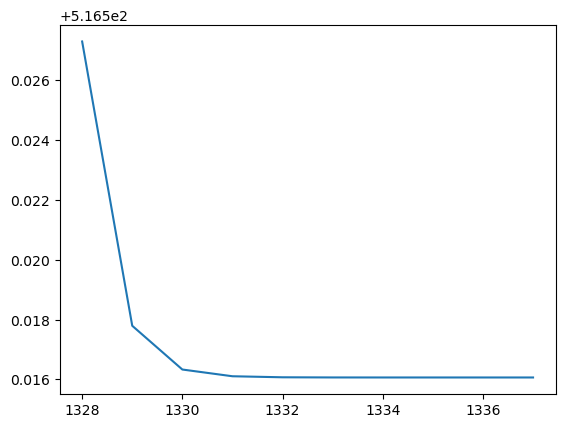

In [64]:
x2.plot()

In [65]:
data["Low"].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1328 entries, 2017-01-03 to 2022-03-31
Series name: Low
Non-Null Count  Dtype  
--------------  -----  
1328 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [66]:
train = data["Low"].iloc[:1401]
test = data["Low"].iloc[1401:]

In [67]:
auto_arima(train, m=7, seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1328
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4148.737
Date:                Thu, 29 Dec 2022   AIC                           8303.473
Time:                        04:28:58   BIC                           8319.045
Sample:                             0   HQIC                          8309.310
                               - 1328                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1765      0.160      1.102      0.271      -0.137       0.490
ma.L1         -0.1844      0.007    -27.512      0.000      -0.198      -0.171
sigma2        30.4122      0.261    116.389      0.000      29.900      30.924
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            293886.56
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                            -2.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        75.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [69]:
model = SARIMAX()

TypeError: __init__() missing 1 required positional argument: 'endog'

In [70]:
auto_arima(data["Low"], m=7, seasonal=True)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True)

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [72]:
start=len(train)
end=len(train)+len(test)-1

In [73]:
model1 = SARIMAX(train,order=(0, 1, 1), seasonal_order=(0, 0, 0, 7))

C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [74]:
results= model1.fit()

In [75]:
prerdictions = results.predict(start=end, end=start, dynamic=False, typ='levels')

C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [76]:
prerdictions

1327    506.332682
1328    506.060761
Name: predicted_mean, dtype: float64

In [77]:
len(prerdictions)

2

In [78]:
x3 =results.forecast(10)

C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [79]:
x3

1328    506.060761
1329    506.060761
1330    506.060761
1331    506.060761
1332    506.060761
1333    506.060761
1334    506.060761
1335    506.060761
1336    506.060761
1337    506.060761
Name: predicted_mean, dtype: float64

In [80]:
x3.iloc[-1]

506.06076063563273

<AxesSubplot:>

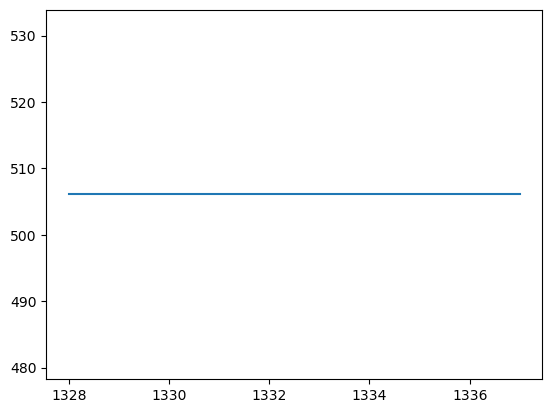

In [81]:
x3.plot()

In [82]:
data["Close"].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1328 entries, 2017-01-03 to 2022-03-31
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1328 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [83]:
train = data["Close"].iloc[:1401]
test = data["Close"].iloc[1401:]

In [87]:
auto_arima(train, m=7, seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1328
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -3818.942
Date:                             Thu, 29 Dec 2022   AIC                           7651.883
Time:                                     04:38:30   BIC                           7688.218
Sample:                                          0   HQIC                          7665.502
                                            - 1328                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5433      0.027     56.252      0.000       1.490       1.597
ar.L2         -0.9297      0.027    -35.054      0.000      -0.982      -0.878
ma.L1         -1.5543      0.022    -70.401      0.000      -1.598      -1.511
ma.L2          0.9614      0.021     45.109      0.000       0.920       1.003
ar.S.L7       -0.6366      0.229     -2.786      0.005      -1.085      -0.189
ma.S.L7        0.6874      0.217      3.164      0.002       0.262       1.113
sigma2        18.4976      0.371     49.887      0.000      17.771      19.224
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):              2079.15
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               3.30   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [86]:
model = SARIMAX()

TypeError: __init__() missing 1 required positional argument: 'endog'

In [88]:
auto_arima(data["Close"], m=7, seasonal=True)

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [90]:
start=len(train)
end=len(train)+len(test)-1

In [91]:
model1 = SARIMAX(train,order=(2, 1, 2), seasonal_order=(1, 0, 1, 7))

C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [92]:
results= model1.fit()

In [93]:
prerdictions = results.predict(start=end, end=start, dynamic=False, typ='levels'

SyntaxError: unexpected EOF while parsing (3394811777.py, line 1)

In [94]:
prerdictions

1327    506.332682
1328    506.060761
Name: predicted_mean, dtype: float64

In [95]:
len(prerdictions)

2

In [96]:
x4 =results.forecast(10)

C:\Users\danthiee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [97]:
x4

1328    506.279973
1329    506.678533
1330    506.282522
1331    505.266845
1332    505.245588
1333    503.716927
1334    502.877120
1335    503.561386
1336    504.105504
1337    504.787118
Name: predicted_mean, dtype: float64

In [98]:
x4.iloc[-1]

504.78711818118853

<AxesSubplot:>

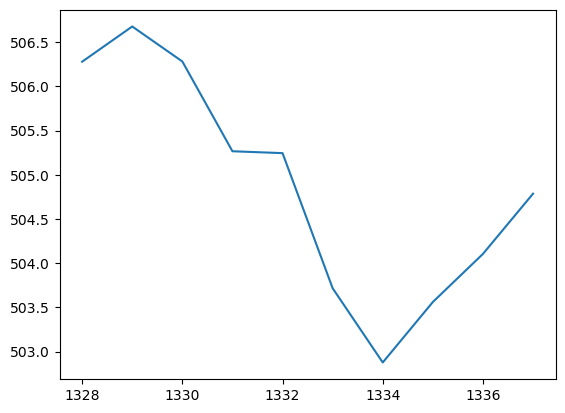

In [99]:
x4.plot()